# What's The Target ?
### Here I am first trying to predict the next contest increase or decrease in rating based on other features known beforehand

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Dataset/cleaned_data.csv')
df.head(10)

,Unnamed: 0,contestId,handle,rank,oldRating,newRating,startTimeSeconds,acceptance_rate,avg_rating,dp,...,flows,string suffix structures,graph matchings,fft,2-sat,*special,meet-in-the-middle,expression parsing,changeRating,date
0,8267,2108.0,chandler1837,565.0,1769.0,1817.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,1970-01-01 00:00:00
1,6714,2106.0,varun930,8469.0,912.0,968.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,1970-01-01 00:00:00
2,1400,2108.0,__FlowerandYou,194.0,2047.0,2079.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,1970-01-01 00:00:00
3,894,2108.0,hyx000,28.0,1852.0,2072.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,220.0,1970-01-01 00:00:00
4,1304,2106.0,sury666,2452.0,1506.0,1494.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-12.0,1970-01-01 00:00:00
5,5021,2108.0,shreyk,2257.0,1392.0,1438.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,1970-01-01 00:00:00
6,97,2106.0,dsogari,8352.0,1450.0,1368.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-82.0,1970-01-01 00:00:00
7,8002,2108.0,Hiya1055,3830.0,1603.0,1545.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-58.0,1970-01-01 00:00:00
8,8081,2106.0,Plavac52431,901.0,1315.0,1420.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.0,1970-01-01 00:00:00
9,8082,2108.0,Plavac52431,4121.0,1420.0,1398.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-22.0,1970-01-01 00:00:00


## Removing some useless columns for classification

In [3]:
df.columns

Index(['Unnamed: 0', 'contestId', 'handle', 'rank', 'oldRating', 'newRating',
       'startTimeSeconds', 'acceptance_rate', 'avg_rating', 'dp',
       'divide and conquer', 'two pointers', 'binary search',
       'dfs and similar', 'dsu', 'games', 'sortings', 'graphs',
       'data structures', 'brute force', 'schedules', 'probabilities',
       'strings', 'chinese remainder theorem', 'geometry', 'bitmasks',
       'implementation', 'matrices', 'trees', 'combinatorics', 'number theory',
       'constructive algorithms', 'ternary search', 'interactive', 'greedy',
       'shortest paths', 'math', 'hashing', 'flows',
       'string suffix structures', 'graph matchings', 'fft', '2-sat',
       '*special', 'meet-in-the-middle', 'expression parsing', 'changeRating',
       'date'],
      dtype='object')

In [4]:
useful_cols = ['rank','oldRating','acceptance_rate', 'avg_rating',
       'string suffix structures', 'matrices', 'graphs', '*special',
       'brute force', 'data structures', 'ternary search', 'interactive', 'dp',
       'constructive algorithms', 'binary search', 'combinatorics', 'games',
       'divide and conquer', 'two pointers', 'strings', 'geometry', 'greedy',
       'dfs and similar', 'math', 'bitmasks', 'trees', 'number theory',
       'implementation', 'shortest paths', 'sortings', 'probabilities',
       'graph matchings', 'fft', '2-sat', 'schedules', 'hashing', 'dsu',
       'flows', 'chinese remainder theorem', 'expression parsing',
       'meet-in-the-middle', 'changeRating']
u_df = df[useful_cols]
u_df.head()

,rank,oldRating,acceptance_rate,avg_rating,string suffix structures,matrices,graphs,*special,brute force,data structures,...,fft,2-sat,schedules,hashing,dsu,flows,chinese remainder theorem,expression parsing,meet-in-the-middle,changeRating
0,565.0,1769.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0
1,8469.0,912.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
2,194.0,2047.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0
3,28.0,1852.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,220.0
4,2452.0,1506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-12.0


### Prediction Approach
##### For this data containing the problem solving information of multiple users we can approach with KNN classifier with the classes of rank increase or rank decrease

In [5]:
X = u_df[u_df.columns[:-1]]         # all excluding the last i.e rating change which we are gonna predict
y = u_df[u_df.columns[-1]].apply(lambda x : 0 if x <= 0 else 1)

### Test set and Train set
#### As this is a cluster of data and A new data that we are going to predict can be from a seperate user not in the dataset
#### So we can randomly take some data out of the total for the testing dataset 

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

### Validation set
#### For validation we can take some users out of our userlist and use their data

In [7]:
import os
import random
from Collector import get_user_data

validation_pathname = 'Dataset/validation.csv'
validation_df = None

if os.path.exists(validation_pathname):
    validation_df = pd.read_csv(validation_pathname)
else:
    # Take randomly other users not present in test or train
    test_train_users = set(df['handle'])
    all_users = pd.read_csv('Dataset/all_users.csv')
    all_users_set = set(all_users['handle'])
    validation_users = list(all_users_set.difference(test_train_users))
    
    # Randomly select 15 users for validation
    validation_users = random.sample(validation_users, 15)
    print(validation_users)
    validation_df_list = []
    # Taking the data of these users
    for user in validation_users:
        user_data = get_user_data(user)
        if user_data is not None and not user_data.empty:
            # Basic cleaning of the data having 0 previous rating
            user_data = user_data[user_data['oldRating'] != 0]
            validation_df_list.append(user_data)
            print(f'taken data for {user}')
    validation_df = pd.concat(objs=tuple(validation_df_list), ignore_index=True)
    # Ensure all columns in useful_cols exist in validation_df
    for col in useful_cols:
        if col not in validation_df.columns:
            validation_df[col] = 0  # Add the missing column with all zero entries
    validation_df.fillna(0, inplace=True)
    validation_df.to_csv(validation_pathname, index=False)
validation_df.head(10)

['spud-nik', 'Ghulam_Junaid', 'Westin_sheep', 'MohitKourav', 'ujjwalacid', 'Pratik__9284', 'Mehul_zzz', 'divyansh_gupta2023', 'Pratik_Magdum', 'Yufo', 'efkasbvkbaskv', 'Tyx2019', 'Catling', 'bestows', 'xiaodaiyang']
taken data for spud-nik
taken data for Ghulam_Junaid
taken data for Westin_sheep
taken data for MohitKourav
taken data for ujjwalacid
taken data for Pratik__9284
taken data for Mehul_zzz
taken data for divyansh_gupta2023
taken data for Pratik_Magdum
taken data for Yufo
taken data for efkasbvkbaskv
taken data for Tyx2019
taken data for Catling
taken data for bestows
taken data for xiaodaiyang


,contestId,handle,rank,oldRating,newRating,startTimeSeconds,acceptance_rate,avg_rating,games,sortings,...,probabilities,fft,expression parsing,matrices,divide and conquer,hashing,flows,schedules,chinese remainder theorem,changeRating
0,2053,spud-nik,5722,453,803,1.735396e+09,0.272727,966.666667,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2057,spud-nik,5052,803,1069,1.736001e+09,0.333333,980.000000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2055,spud-nik,12481,1069,1143,1.736692e+09,0.388889,957.142857,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2056,spud-nik,9084,1143,1205,1.737124e+09,0.440000,1081.818182,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2060,spud-nik,1214,1205,1372,1.737297e+09,0.548387,1111.764706,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,2061,spud-nik,2910,1372,1424,1.737384e+09,0.594595,1100.000000,2.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,2062,spud-nik,2154,1424,1519,1.737902e+09,0.568627,1131.034483,2.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,2075,spud-nik,5390,1519,1478,1.742222e+09,0.590164,1175.000000,3.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,2085,spud-nik,6873,1478,1415,1.742654e+09,0.534247,1176.923077,3.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,2090,spud-nik,1842,1415,1436,1.742708e+09,0.500000,1200.000000,3.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [8]:
validation_df = validation_df[useful_cols]
validation_df.head(10)

,rank,oldRating,acceptance_rate,avg_rating,string suffix structures,matrices,graphs,*special,brute force,data structures,...,fft,2-sat,schedules,hashing,dsu,flows,chinese remainder theorem,expression parsing,meet-in-the-middle,changeRating
0,5722,453,0.272727,966.666667,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,5052,803,0.333333,980.000000,0.0,0.0,0.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,12481,1069,0.388889,957.142857,0.0,0.0,0.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,9084,1143,0.440000,1081.818182,0.0,0.0,0.0,0.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1214,1205,0.548387,1111.764706,0.0,0.0,2.0,0.0,8.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,2910,1372,0.594595,1100.000000,0.0,0.0,3.0,0.0,9.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
6,2154,1424,0.568627,1131.034483,0.0,0.0,3.0,0.0,9.0,5.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
7,5390,1519,0.590164,1175.000000,0.0,0.0,5.0,0.0,11.0,6.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
8,6873,1478,0.534247,1176.923077,0.0,0.0,5.0,0.0,11.0,6.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
9,1842,1415,0.500000,1200.000000,0.0,0.0,5.0,0.0,11.0,7.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


## Training Model on collective data
## Approach 1
### Using KNN algorithm

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# Train the KNN model
model = KNeighborsClassifier(n_neighbors=5, algorithm='auto', n_jobs=-1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

e:\Python_projs\DS_first_year_project\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "e:\Python_projs\DS_first_year_project\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\kings\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kings\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1039, in __init__
    self

### Evaluation on test set

Accuracy: 0.83


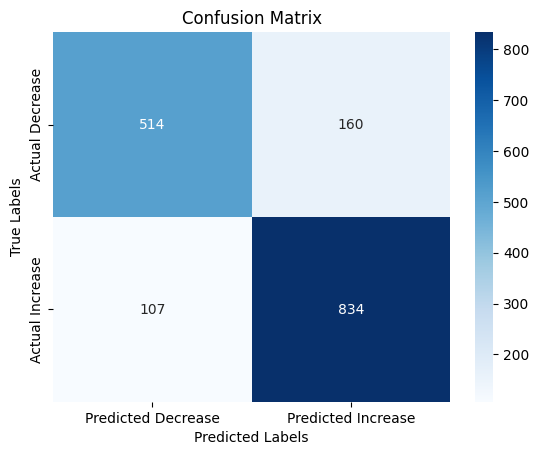

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       674
           1       0.84      0.89      0.86       941

    accuracy                           0.83      1615
   macro avg       0.83      0.82      0.83      1615
weighted avg       0.83      0.83      0.83      1615



In [10]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix with improved labels
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(
    conf_matrix, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=['Predicted Decrease', 'Predicted Increase'], 
    yticklabels=['Actual Decrease', 'Actual Increase']
)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

### Evaluation on validation set

Validation Accuracy: 0.39


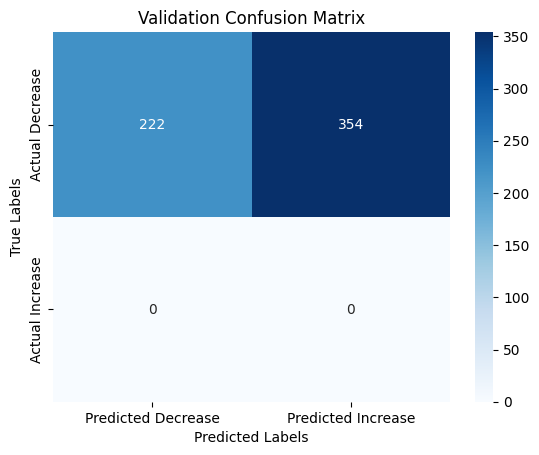

Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.39      0.56       576
           1       0.00      0.00      0.00         0

    accuracy                           0.39       576
   macro avg       0.50      0.19      0.28       576
weighted avg       1.00      0.39      0.56       576



e:\Python_projs\DS_first_year_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Python_projs\DS_first_year_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Python_projs\DS_first_year_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
X_val = validation_df[validation_df.columns[:-1]]         # all excluding the last i.e rating change which we are gonna predict
y_val = validation_df[validation_df.columns[-1]].apply(lambda x : 0 if x <= 0 else 1)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

accuracy_val = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy_val:.2f}')
# Confusion matrix for validation set
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
sns.heatmap(
    conf_matrix_val, 
    annot=True, 
    fmt='d',
    cmap='Blues', 
    xticklabels=['Predicted Decrease', 'Predicted Increase'], 
    yticklabels=['Actual Decrease', 'Actual Increase']
)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Validation Confusion Matrix')
plt.show()
# Classification report for validation set
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

### Accuracy plots for different K

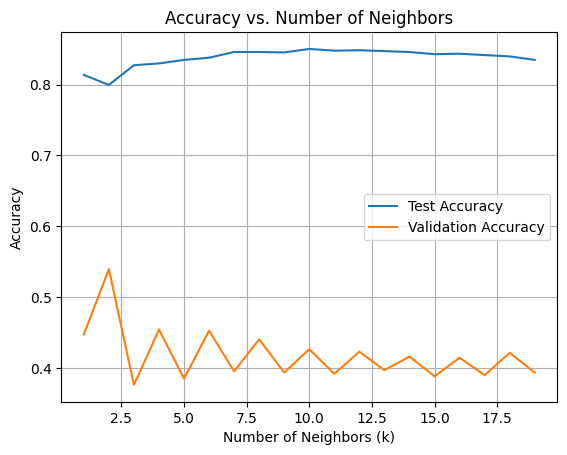

In [12]:
accuracy_test = []
accuracy_val = []
k_max = 20
for i in range(1, k_max):
    # Train the KNN model
    model = KNeighborsClassifier(n_neighbors=i, algorithm='auto', n_jobs=-1)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

    # Calculate accuracy for test set
    accuracy_test.append(accuracy_score(y_test, y_pred))

    # Make predictions on the validation set
    y_val_pred = model.predict(X_val)
    
    # Calculate accuracy for validation set
    accuracy_val.append(accuracy_score(y_val, y_val_pred))

plt.plot(range(1, k_max), accuracy_test, label='Test Accuracy')
plt.plot(range(1, k_max), accuracy_val, label='Validation Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.legend()
plt.grid()
plt.show()

#### Best accuracy for K = 2

## Approach 2
## Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

### Evaluation on test set

Random Forest Accuracy: 0.83


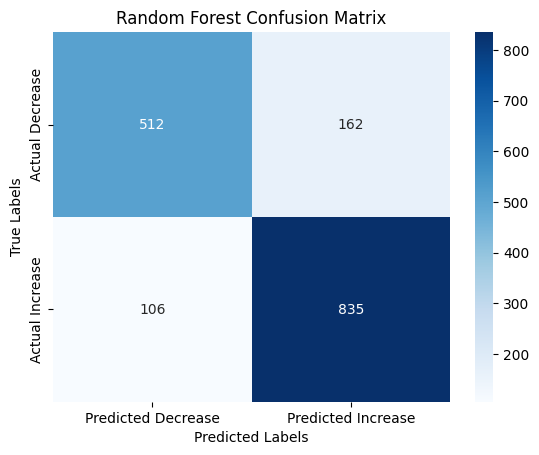

In [14]:
# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

# Confusion matrix with improved labels
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(
    conf_matrix_rf,
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=['Predicted Decrease', 'Predicted Increase'], 
    yticklabels=['Actual Decrease', 'Actual Increase']
)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Confusion Matrix')
plt.show()

### Evaluation on validation set

Random Forest Accuracy: 0.36


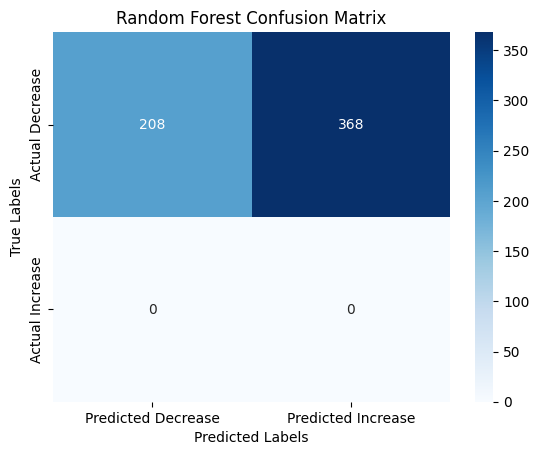

In [15]:
y_pred_rf_val = rf_model.predict(X_val)
y_pred_proba_rf_val = rf_model.predict_proba(X_val)[:, 1]  # Probabilities for the positive class

# Calculate accuracy
accuracy_rf_val = accuracy_score(y_val, y_pred_rf_val)
print(f'Random Forest Accuracy: {accuracy_rf_val:.2f}')

# Confusion matrix with improved labels
conf_matrix_rf_val = confusion_matrix(y_val, y_pred_rf_val)
sns.heatmap(
    conf_matrix_rf_val,
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=['Predicted Decrease', 'Predicted Increase'], 
    yticklabels=['Actual Decrease', 'Actual Increase']
)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Confusion Matrix')
plt.show()